In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
torch.__version__

'1.7.1'

In [37]:
torch.cuda.is_available()




True

In [38]:
torch.cuda.get_device_name(0)


'GeForce GTX 1650'

In [39]:

torch.cuda.device_count()


1

In [2]:
# The function to plot parameters

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:

            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [20]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [21]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [22]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [23]:
# Print the type of the element

print("Type of data element: ", train_dataset[0][0].type())

Type of data element:  torch.FloatTensor


In [24]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


The image:  None


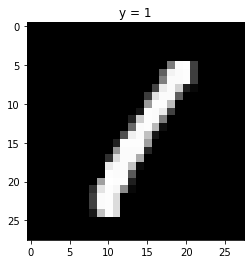

In [25]:
# Plot the image

print("The image: ", show_data(train_dataset[3]))

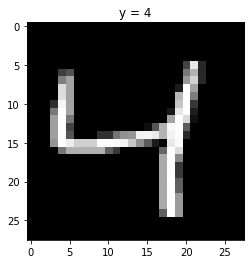

In [26]:
# Plot the image

show_data(train_dataset[2])

## Build Softmax Classifier

In [27]:
class SoftMax(nn.Module):

    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        z = self.linear(x)
        return z

In [28]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [29]:
input_dim = 28*28
output_dim = 10

In [30]:
model = SoftMax(input_dim,output_dim)
print("Print the model:\n",model)

Print the model:
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [31]:
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[0].size())

W:  torch.Size([10, 784])
b:  torch.Size([10, 784])


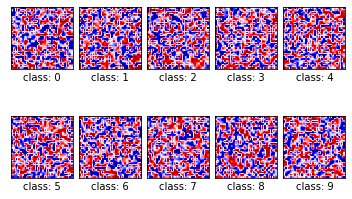

In [32]:
PlotParameters(model)

In [33]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)

In [40]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

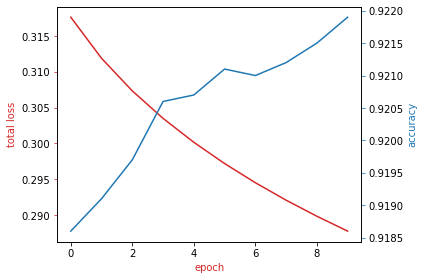

In [41]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

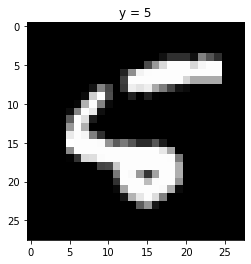

yhat: tensor([6])
probability of class  0.9937421679496765


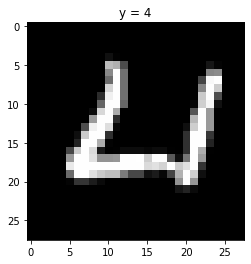

yhat: tensor([6])
probability of class  0.4419935941696167


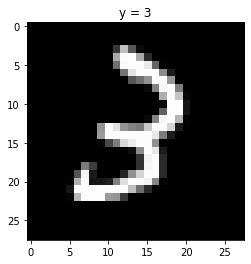

yhat: tensor([2])
probability of class  0.7113448977470398


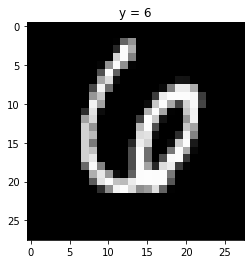

yhat: tensor([7])
probability of class  0.3758998513221741


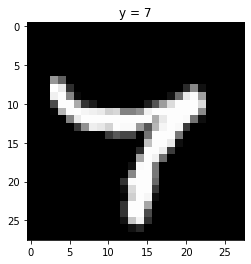

yhat: tensor([4])
probability of class  0.6198086142539978


In [42]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

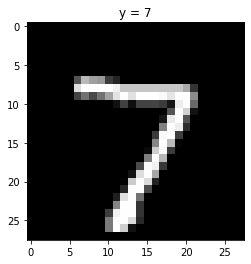

yhat: tensor([7])
probability of class  0.9966427087783813


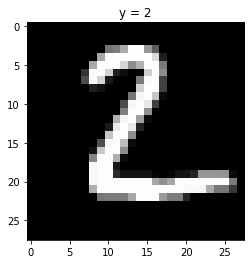

yhat: tensor([2])
probability of class  0.9584542512893677


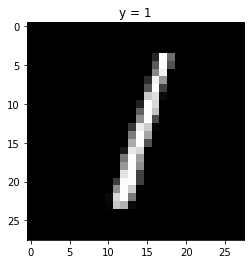

yhat: tensor([1])
probability of class  0.9762134552001953


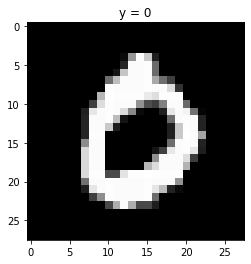

yhat: tensor([0])
probability of class  0.9997054934501648


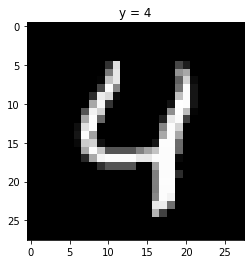

yhat: tensor([4])
probability of class  0.9546643495559692


In [43]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  